## Project 3 - University Fund Raising

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
# Read the data donation

donation= pd.read_excel("C:/Users/Gladys/Documents/1.Data Science Course/14. Class 14 - Project 3/data/Donations.xlsx")

In [110]:
donation.head(10) #I want to predict if the callee will donate so my output variable will be Donated_in_past

,Gender_Caller,Gender_Callee,Time_Slot_Called,Graduation_year,Donated_in_past,Donated_Amount,From_California,Day_ofCalling
0,F,M,5PM-9PM,2004.0,N,25.00,Y,TUESDAY
1,F,F,5PM-9PM,1986.0,Y,20.00,Y,TUESDAY
2,F,F,5PM-9PM,2007.0,N,25.00,Y,TUESDAY
3,NaN,F,5PM-9PM,2008.0,N,20.00,Y,TUESDAY
4,F,F,5PM-9PM,2008.0,N,20.08,Y,TUESDAY
5,F,M,5PM-9PM,2008.0,N,20.08,Y,TUESDAY
6,F,F,5PM-9PM,2008.0,N,5.00,Y,TUESDAY
7,F,M,5PM-9PM,2003.0,N,25.00,Y,TUESDAY
8,F,F,5PM-9PM,2004.0,Y,20.00,Y,TUESDAY
9,F,M,5PM-9PM,2007.0,N,5.00,Y,TUESDAY


In [111]:
donation.info() #There are null values in the output variable Donated_in_past so I'll drop the rows with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_Caller     152 non-null    object 
 1   Gender_Callee     194 non-null    object 
 2   Time_Slot_Called  194 non-null    object 
 3   Graduation_year   182 non-null    float64
 4   Donated_in_past   183 non-null    object 
 5   Donated_Amount    194 non-null    float64
 6   From_California   194 non-null    object 
 7   Day_ofCalling     194 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.2+ KB


In [112]:
donation.shape

(194, 8)

In [113]:
donation = donation.dropna(subset=["Donated_in_past"]) #Drop rows with missing values in Donated_in_past

In [114]:
donation.shape # 11 rows less

(183, 8)

In [115]:
donation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 193
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_Caller     141 non-null    object 
 1   Gender_Callee     183 non-null    object 
 2   Time_Slot_Called  183 non-null    object 
 3   Graduation_year   182 non-null    float64
 4   Donated_in_past   183 non-null    object 
 5   Donated_Amount    183 non-null    float64
 6   From_California   183 non-null    object 
 7   Day_ofCalling     183 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.9+ KB


In [116]:
donation["Gender_Caller"].value_counts()

F    121
M     20
Name: Gender_Caller, dtype: int64

In [117]:
#I will assume that missing Gender_Caller are Female
donation["Gender_Caller"] = donation["Gender_Caller"].fillna("F")
donation

,Gender_Caller,Gender_Callee,Time_Slot_Called,Graduation_year,Donated_in_past,Donated_Amount,From_California,Day_ofCalling
0,F,M,5PM-9PM,2004.0,N,25.00,Y,TUESDAY
1,F,F,5PM-9PM,1986.0,Y,20.00,Y,TUESDAY
2,F,F,5PM-9PM,2007.0,N,25.00,Y,TUESDAY
3,F,F,5PM-9PM,2008.0,N,20.00,Y,TUESDAY
4,F,F,5PM-9PM,2008.0,N,20.08,Y,TUESDAY
...,...,...,...,...,...,...,...,...
189,F,M,5PM-9PM,1973.0,Y,0.00,Y,SUNDAY
190,F,M,5PM-9PM,1981.0,Y,0.00,Y,SUNDAY
191,F,M,5PM-9PM,1995.0,Y,0.00,Y,SUNDAY
192,F,M,5PM-9PM,1949.0,Y,0.00,Y,SUNDAY


In [118]:
donation_["Gender_Caller"].value_counts()

F    163
M     20
Name: Gender_Caller, dtype: int64

In [119]:
donation_.info() #Information in complete

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 193
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_Caller     183 non-null    object 
 1   Gender_Callee     183 non-null    object 
 2   Time_Slot_Called  183 non-null    object 
 3   Graduation_year   182 non-null    float64
 4   Donated_in_past   183 non-null    object 
 5   Donated_Amount    183 non-null    float64
 6   From_California   183 non-null    object 
 7   Day_ofCalling     183 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.9+ KB


In [120]:
#Dummies for Gender_Caller, Gender_Callee,From_California. F=1; M=0;Y=1;N=0
donation.Gender_Caller = donation.Gender_Caller.apply(lambda x: 1 if 'F' in x else 0)

In [121]:
donation.Gender_Callee = donation.Gender_Callee.apply(lambda x: 1 if 'F' in x else 0)

In [122]:
donation.From_California = donation.From_California.apply(lambda x: 1 if 'Y' in x else 0)

In [123]:
donation

,Gender_Caller,Gender_Callee,Time_Slot_Called,Graduation_year,Donated_in_past,Donated_Amount,From_California,Day_ofCalling
0,1,0,5PM-9PM,2004.0,N,25.00,1,TUESDAY
1,1,1,5PM-9PM,1986.0,Y,20.00,1,TUESDAY
2,1,1,5PM-9PM,2007.0,N,25.00,1,TUESDAY
3,1,1,5PM-9PM,2008.0,N,20.00,1,TUESDAY
4,1,1,5PM-9PM,2008.0,N,20.08,1,TUESDAY
...,...,...,...,...,...,...,...,...
189,1,0,5PM-9PM,1973.0,Y,0.00,1,SUNDAY
190,1,0,5PM-9PM,1981.0,Y,0.00,1,SUNDAY
191,1,0,5PM-9PM,1995.0,Y,0.00,1,SUNDAY
192,1,0,5PM-9PM,1949.0,Y,0.00,1,SUNDAY


In [124]:
#Train test split and standarize data before modelling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = donation[["Gender_Caller", "Gender_Callee", "From_California"]]
Y = donation["Donated_in_past"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
##Import
from sklearn.tree import DecisionTreeClassifier

##Instantiate
dtree = DecisionTreeClassifier()

#Fit
dtree.fit(X_train, Y_train)

#predict
Y_pred = dtree.predict(X_test)

#Evaluate

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,Y_pred))

print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           N       0.85      1.00      0.92        47
           Y       0.00      0.00      0.00         8

    accuracy                           0.85        55
   macro avg       0.43      0.50      0.46        55
weighted avg       0.73      0.85      0.79        55

[[47  0]
 [ 8  0]]


C:\Users\Gladys\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
# Depth is maximum distance between the root and any leaf.

dtree.get_depth()

3

In [127]:
# Return the number of leaves of the decision tree
dtree.get_n_leaves()

6

In [128]:
# Return the feature importances.
dtree.feature_importances_

array([0.35726824, 0.4431833 , 0.19954846])

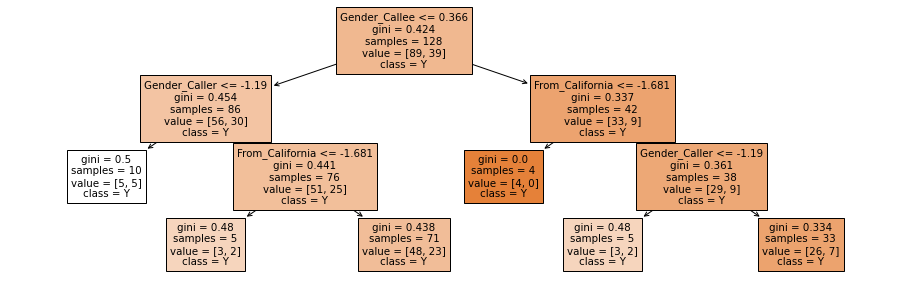

In [130]:
# Decision tree plot

from sklearn.tree import plot_tree

plt.figure(figsize = (16,5))
plot_tree(dtree, filled = True, feature_names = ["Gender_Caller", "Gender_Callee", "From_California"], class_names = ["Y", "N"])
plt.show()

I think something is wrong because I obtain all Y in the tree but I don't know what is the problem. Also, I'm not sure how to read it. I believe that I understand the steps but not the interpretation. I need to look more into it.